# LASI2022 - Introduction to Machine Learning

## KMeans Clustering

In [1]:
# import libraries

import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Load Dataset

In [2]:
df = pd.read_csv("data/mallcustomers.csv")

Although there are four columns, we will only use Income and Score for clustering. Income is personal income. Score is an index of the amount the customer spends.

In [3]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## KMeans Clustering

In [4]:
# X will be a subset of the data
X = df[['Score','Income']]

In [5]:
# We are asking the algorithm to identify 5 clusters or groups
km = KMeans(n_clusters=5).fit(X)

In [6]:
# retrieve the results in the form of an array
results = km.predict(X)

In [7]:
# look at sample results
results[0:50]

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1], dtype=int32)

In [8]:
# create a dataframe for the clusters
clusters = pd.DataFrame(results,columns=['cluster'])

In [9]:
# create a new dataframe which joins the cluster to X
df_c = X.join(clusters, how='outer')

In [10]:
df_c.head()

,Score,Income,cluster
0,39,15,2
1,81,15,0
2,6,16,2
3,77,16,0
4,40,17,2


<AxesSubplot:xlabel='Income', ylabel='Score'>

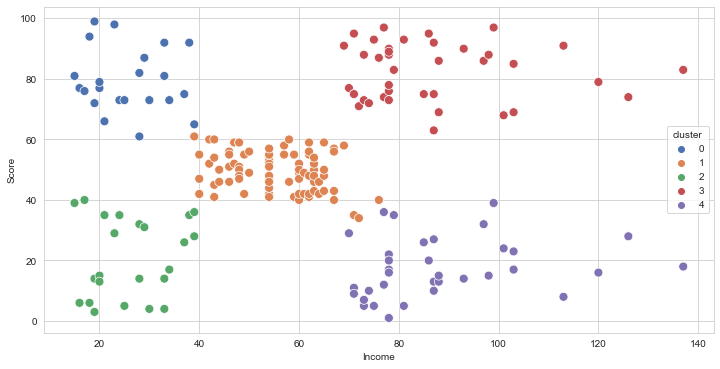

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",data=df_c,hue="cluster",
                palette="deep",s=80)

In [12]:
category = {0:'Enthusiastic', 1:'Conservative', 
            2:'Middle-of-the-Road', 3:'Browsers',4:'Luxury'}

In [13]:
df_c['cat'] = df_c['cluster']

In [14]:
df_c = df_c.replace({'cat':category})

<AxesSubplot:xlabel='Income', ylabel='Score'>

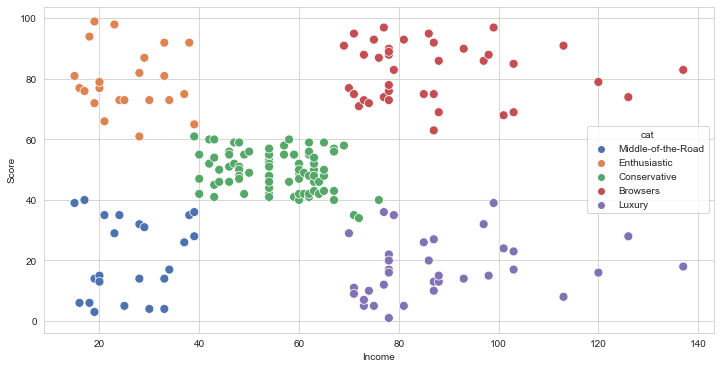

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",data=df_c,hue="cat",
                palette="deep", s=80)
